In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw



In [6]:
data = pd.read_excel('数据集汇总.xlsx', sheet_name='Sheet1')
data

,阳离子smile,是否形成（Y能N否）,y_true
0,CCCCCC([NH3+])C,Y,1
1,[NH3+]CCSSCC[NH3+],Y,1
2,BrC1=CC=CC=C1CC[NH3+],Y,1
3,ClC1=CC=CC=C1CC[NH3+],Y,1
4,[NH3+]CCOCC[NH3+],Y,1
...,...,...,...
100,Cc1ccc([NH3+])cc1F,N,0
101,[NH3+]c1ccc(C(F)(F)F)cc1,N,0
102,[NH3+]c1cc(C(F)(F)F)cc(C(F)(F)F)c1,N,0
103,C[NH2+]c1ccccc1F,N,0


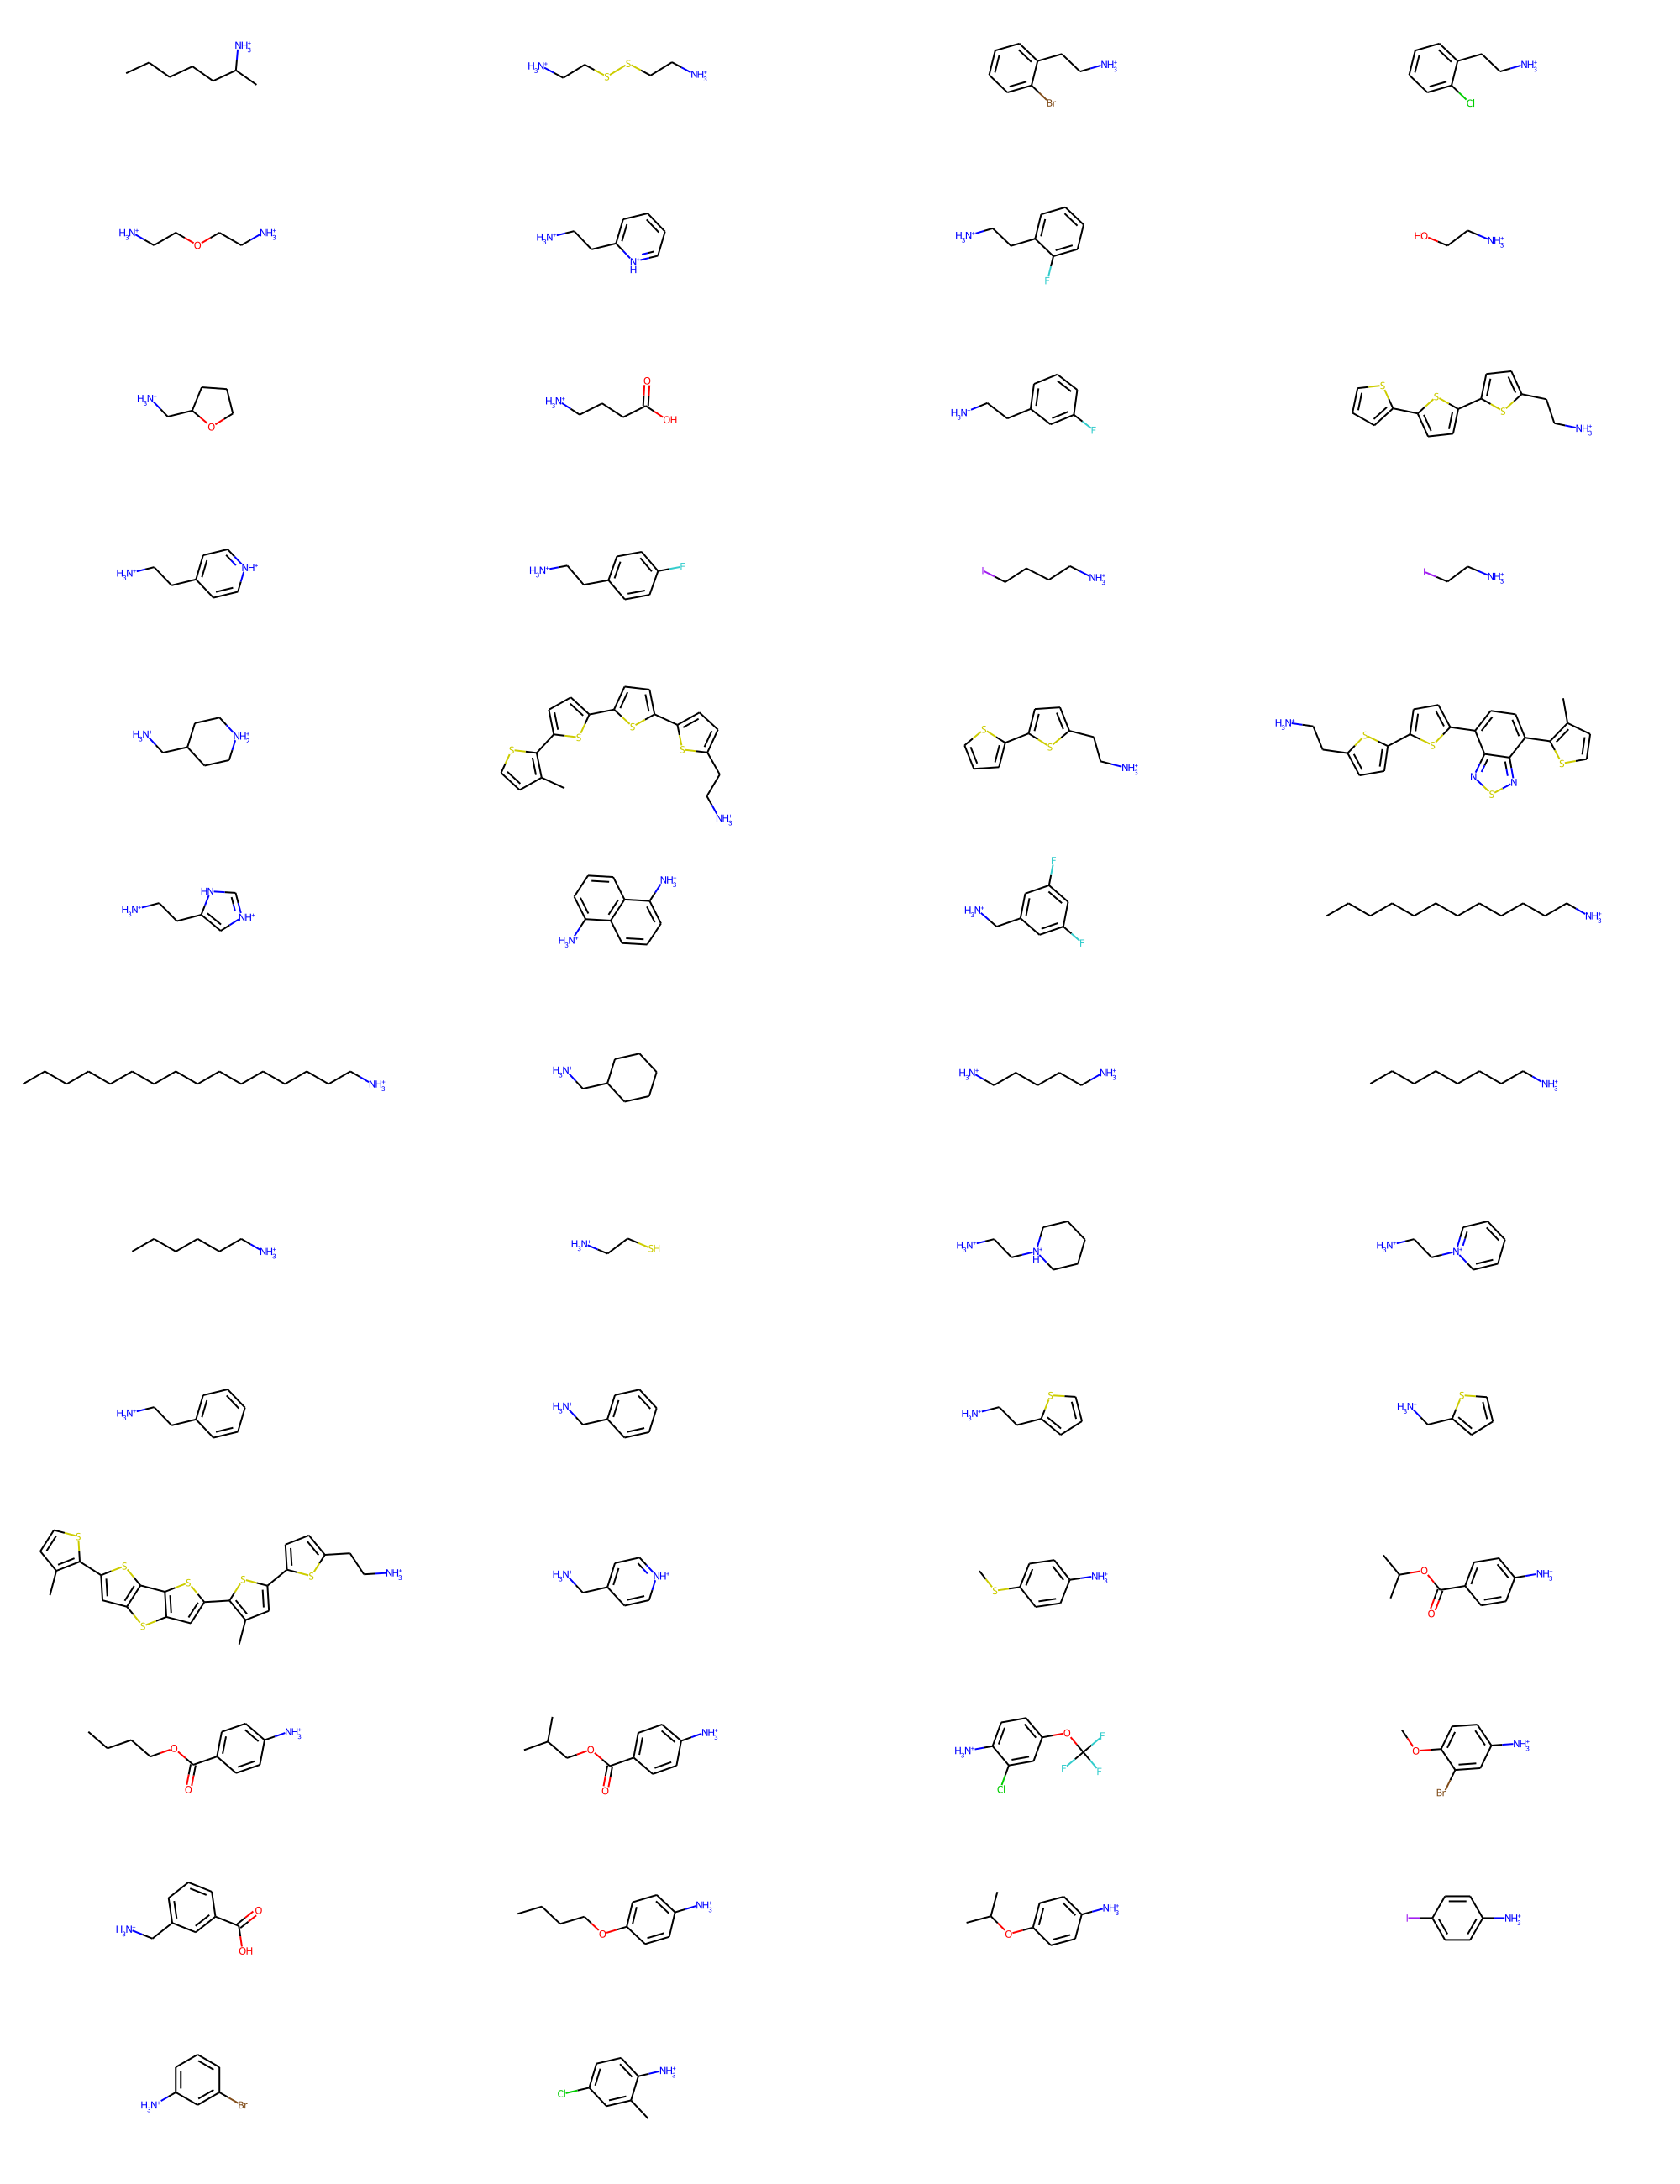

In [12]:
smile_all = data['阳离子smile']
y_true = data['y_true']

mol_all = [Chem.MolFromSmiles(smile) for smile in smile_all]
mol_1 =[] #能形成2D结构的分子
mol_0 =[] #不能形成2D结构的分子
for i in range(len(mol_all)):
    if y_true[i] == 1:
        mol_1.append(mol_all[i])
    else:
        mol_0.append(mol_all[i])
Draw.MolsToGridImage(mol_1, molsPerRow=4, subImgSize=(500, 200)) #绘制能形成2D结构的分子


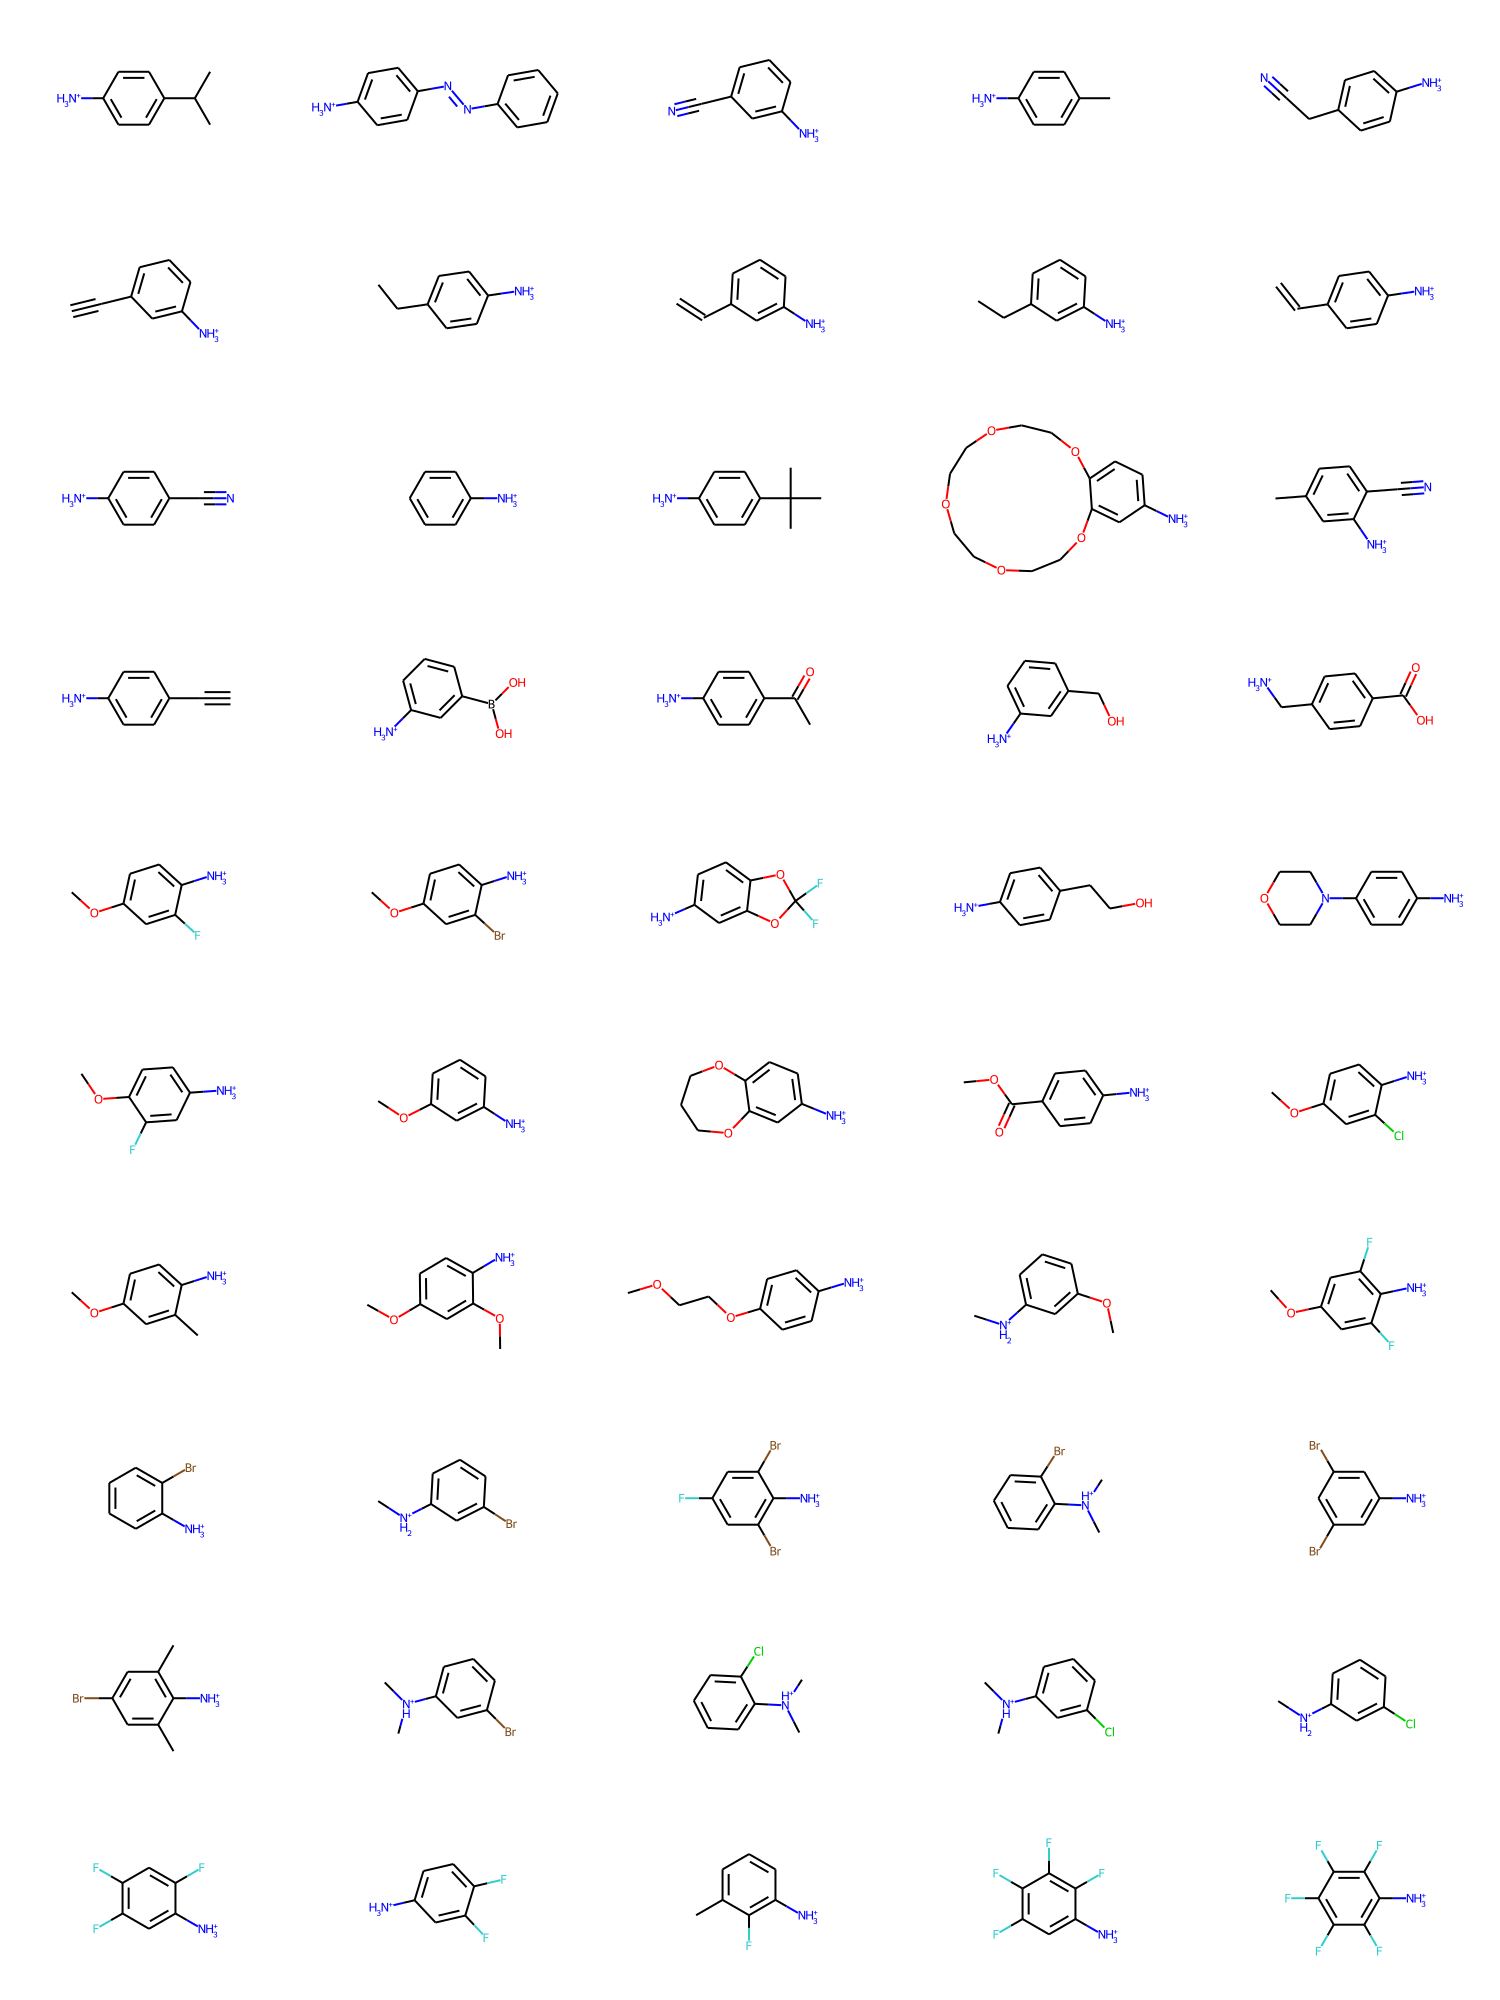

In [16]:
Draw.MolsToGridImage(mol_0, molsPerRow=5, subImgSize=(300, 200)) #绘制不能形成2D结构的分子

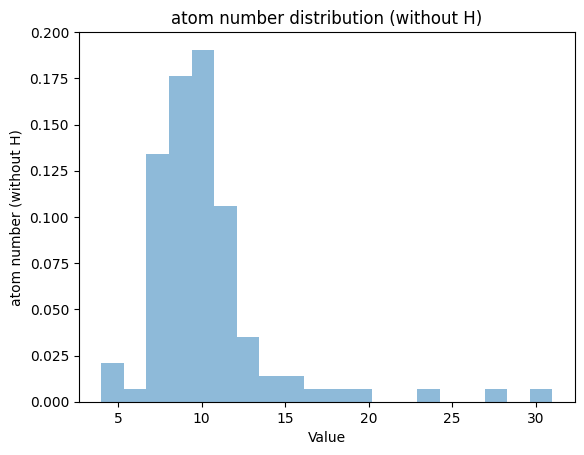

In [17]:
mol_test = Chem.MolFromSmiles('c1ccccc1')
mol_test = Chem.AddHs(mol_test)
mol_test.GetNumAtoms()

#分析分子中非氢原子的数量和加氢后原子的数量分布
nonH_number = [mol.GetNumAtoms() for mol in mol_all] 
addH_number = [Chem.AddHs(mol).GetNumAtoms() for mol in mol_all]
plt.hist(nonH_number, bins=20, density=True, alpha=0.5, label='nonH_number',)
plt.title('atom number distribution (without H)')
plt.xlabel('Value')
plt.ylabel('atom number (without H)')
plt.savefig('atom_number_distribution_withoutH.png')

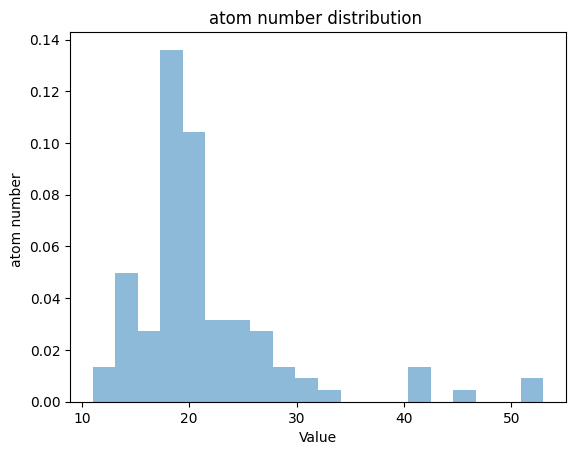

In [18]:
plt.hist(addH_number, bins=20, density=True, alpha=0.5) #绘制加氢后原子的数量分布
plt.title('atom number distribution ')
plt.xlabel('Value')
plt.ylabel('atom number ') #出现几个很大的值是3T、4T等含有多个S环的特殊结构，实验阳离子有限导致非正态分布
plt.savefig('atom_number_distribution.png')

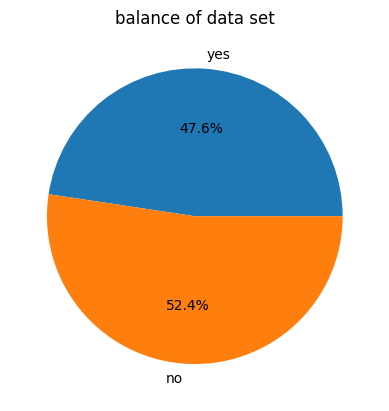

In [19]:
# 分析数据集的平衡性
#绘制饼状图, 并标记样本的数量

plt.pie([len(mol_1), len(mol_0)], labels=['yes', 'no'],autopct='%1.1f%%')
plt.title('balance of data set')
plt.savefig('balance_of_data_set.png')

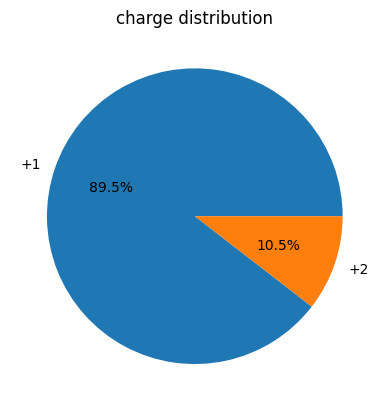

In [20]:
# 获取总电荷
charge = []
for mol in mol_all:
    char = 0
    for atom in mol.GetAtoms():
        char += atom.GetFormalCharge()
    charge.append(char)

charge_1_num = charge.count(1)
charge_2_num = charge.count(2)

plt.pie([charge_1_num, charge_2_num], labels=['+1', '+2'],autopct='%1.1f%%')
plt.title('charge distribution')
plt.savefig('charge_distribution.png')